In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode 
init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
ned = yf.download('NED.JO', start='2012-01-01', end='2023-05-12')
absa = yf.download('ABG.JO', start='2012-01-01', end='2023-05-12')
fsr = yf.download('FSR.JO', start='2012-01-01', end='2023-05-12')
cpi = yf.download('CPI.JO', start='2012-01-01', end='2023-05-12')
zar = yf.download('ZAR=X', start='2012-01-01', end='2023-05-12')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
ned.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,14500.0,14500.0,14500.0,14500.0,8007.112793,0
2012-01-03,14125.0,14799.0,14125.0,14503.0,8008.770508,400392
2012-01-04,14500.0,14744.0,14347.0,14550.0,8034.725586,489301
2012-01-05,14550.0,14631.0,14435.0,14536.0,8026.992676,312185
2012-01-06,14600.0,14745.0,14494.0,14660.0,8095.467773,368133
2012-01-09,14100.0,14807.0,14100.0,14807.0,8176.645508,431325
2012-01-10,14750.0,14900.0,14750.0,14900.0,8228.000000,211066
2012-01-11,14980.0,14980.0,14720.0,14753.0,8146.823242,495255
2012-01-12,14895.0,15110.0,14810.0,15110.0,8343.965820,372028


Text(0.5, 1.0, 'South African Banks')

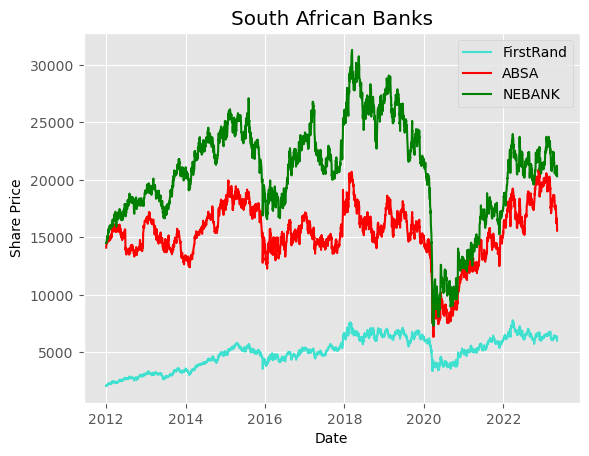

In [5]:
plt.plot(fsr['Close'], color='turquoise', label='FirstRand')
plt.plot(absa['Close'], color='red', label='ABSA')
plt.plot(ned['Close'], color='green', label='NEBANK')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.title('South African Banks')

In [6]:
from pathlib import Path
directory = Path.cwd() / '/home/mngadil/Downloads'
file = directory / 'HHRates.csv'

In [7]:
HHRates = pd.read_csv(file, index_col='Date', parse_dates=True)

In [8]:
HHRates = HHRates['Value']

In [9]:
HHRates.head()

Date
2013-01-01    15.16
2013-02-01    15.07
2013-03-01    15.06
2013-04-01    15.12
2013-05-01    15.03
Name: Value, dtype: float64

Text(0.5, 1.0, 'The South African Rand against the US-Dollar')

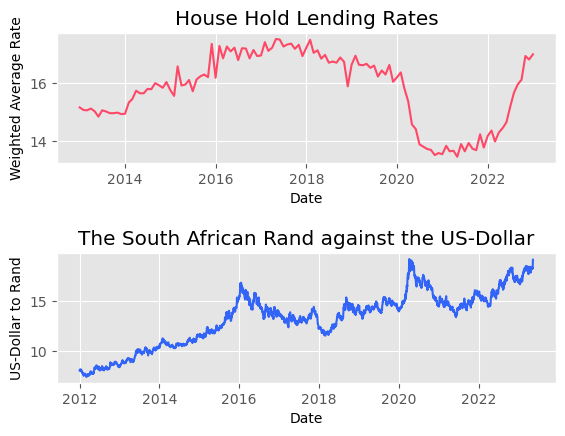

In [10]:
plt.tight_layout()
plt.subplot(211)
plt.title('House Hold Lending Rates')
plt.plot(HHRates, color='#ff4766', label='HouseHold Rates')
plt.xlabel('Date')
plt.ylabel('Weighted Average Rate')
plt.subplot(212)
plt.tight_layout(pad=3.0)
plt.plot(zar['Close'], color='#3164f7', label='SouthAfrican Rand')
plt.xlabel('Date')
plt.ylabel('US-Dollar to Rand')
plt.title('The South African Rand against the US-Dollar')

In [11]:
# DKR = yf.download('DKR.JO', start='2012-01-01', end='2023-05-12')
# CCO = yf.download('CCO.JO', start='2012-01-01', end='2023-05-12')
# VKE = yf.download('VKE.JO', start='2012-01-01', end='2023-05-12')
# APF = yf.download('APF.JO', start='2012-01-01', end='2023-05-12')

In [12]:
# plt.plot(DKR['Close'], color='turquoise', label='Deutsche Konsum')
# plt.plot(CCO['Close'], color='red', label='Capital & Counties')
# plt.plot(VKE['Close'], color='green', label='Vukile P.F')
# plt.legend()

In [13]:
ned.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,14500.0,14500.0,14500.0,14500.0,8007.112793,0
2012-01-03,14125.0,14799.0,14125.0,14503.0,8008.770508,400392
2012-01-04,14500.0,14744.0,14347.0,14550.0,8034.725586,489301
2012-01-05,14550.0,14631.0,14435.0,14536.0,8026.992676,312185
2012-01-06,14600.0,14745.0,14494.0,14660.0,8095.467773,368133


In [14]:
merg_dict = {'NED' : ned['Close'], 'ABSA':absa['Close'], 'FSR':fsr['Close']}
merged = pd.DataFrame(data=merg_dict)

In [15]:
merged.head()

,NED,ABSA,FSR
Date,,,
2012-01-02,14500.0,14100.0,2074.0
2012-01-03,14503.0,14300.0,2129.0
2012-01-04,14550.0,14360.0,2105.0
2012-01-05,14536.0,14376.0,2120.0
2012-01-06,14660.0,14500.0,2140.0


In [16]:
px.line(merged)

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged.index, y=merged['NED'], mode='lines+markers', name='Nedbank', line=dict(color='green')))
fig.add_trace(go.Scatter(x=merged.index, y=merged['ABSA'], mode='lines+markers', name='ABSA', line=dict(color='firebrick')))
fig.add_trace(go.Scatter(x=merged.index, y=merged['FSR'], mode='lines+markers', name='FirstRand'))
fig.update_layout(title='South African Banks')